# Random Sampling

In [1]:
import sys
sys.path.append('../')
import os
import numpy as np
from symmetry_breaking_measure import Nickel
import matplotlib.pyplot as plt
import fitz
from colour import Color
from matplotlib.colors import LinearSegmentedColormap

def make_Ramp(ramp_colors): 
    color_ramp = LinearSegmentedColormap.from_list( 'my_list', [ Color( c1 ).rgb for c1 in ramp_colors ] )
    return color_ramp

def rgb_to_hex(rgb):
    return '#{:02x}{:02x}{:02x}'.format(int(rgb[0]*255), int(rgb[1]*255), int(rgb[2]*255))

def crop_pdf_and_replace(pdf_filedir, left, top, right, bottom):
    # Open the PDF
    doc = fitz.open(pdf_filedir)
    # Get the original page dimensions to ensure proper cropping
    page = doc[0]  # Access the first page
    page_rect = page.rect  # Get the page's bounding box (dimensions)
    print(f"Original page dimensions (in points): {page_rect.width} x {page_rect.height}")
    # Define the crop box based on input values
    crop_rect = fitz.Rect(left, top, right, bottom)
    page.set_cropbox(crop_rect)
    # Create a new filename with '_cropped' before '.pdf'
    base_name, ext = os.path.splitext(pdf_filedir)
    output_pdf = base_name + "_cropped" + ext
    # Save the cropped PDF to the new file
    doc.save(output_pdf)
    doc.close()
    # Replace the original file with the cropped one
    os.remove(pdf_filedir)  # Remove the original PDF
    os.rename(output_pdf, pdf_filedir)  # Rename the cropped file to the original name
    print(f"Original file replaced with cropped version: {pdf_filedir}")
    
MIDDLE, RED, BLUE = '#a8b6c1', '#B82601', '#0B3C5D'
NUM_SAMPLES = 20000
cmap_blue = make_Ramp([BLUE, MIDDLE, BLUE])
cmap_red = make_Ramp([MIDDLE, RED])
cmap_red = make_Ramp([rgb_to_hex(cmap_red(cmap_red.N//2)[:3]), RED])

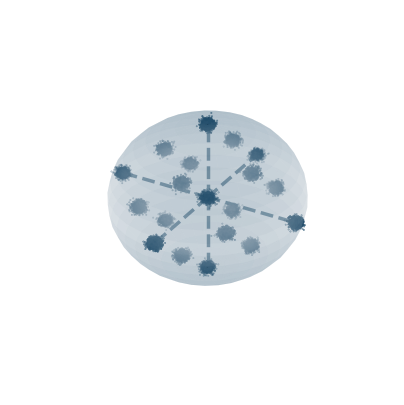

Original page dimensions (in points): 291.6000061035156 x 291.6000061035156
Original file replaced with cropped version: ../figs/nickel/spheroid_nickel_samples_nobackground.pdf


In [22]:
# Spheroid cut off from Nickel (radius=1)
spheroid_nickel = Nickel(cutoff='ellipsoid', cutout_x=1, cutout_y=1, cutout_z=1)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection="3d")
ax = spheroid_nickel.plot_ellipsoid(ax=ax, num_samples=NUM_SAMPLES, cmap=cmap_blue)
ax.set_xlim(-4.2,4.2)
ax.set_ylim(-4.1,4.1)
ax.set_zlim(-3.8,3.8)
ax.set_axis_off()
plt.show()
fig_directory = '../figs/nickel/spheroid_nickel_samples_nobackground.pdf'
fig.savefig(fig_directory)
crop_pdf_and_replace(fig_directory, 72, 72, 226, 212) #left, top, right, bottom

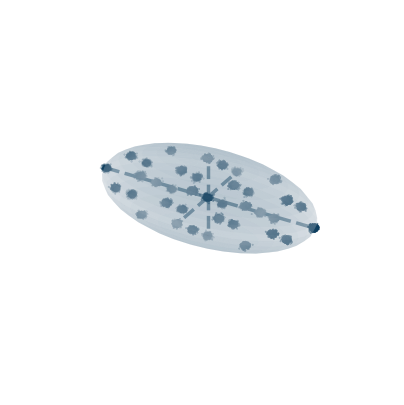

Original page dimensions (in points): 291.6000061035156 x 291.6000061035156
Original file replaced with cropped version: ../figs/nickel/ellipsoid_nickel_samples_nobackground.pdf


In [6]:
# Ellipsoid cut off from Nickel
ellipsoid_nickel = Nickel(cutoff='ellipsoid', cutout_x=2, cutout_y=1, cutout_z=1)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection="3d")
ax = ellipsoid_nickel.plot_ellipsoid(ax=ax, num_samples=NUM_SAMPLES, cmap=cmap_blue)
ax.set_xlim(-7,7)
ax.set_ylim(-7,7)
ax.set_zlim(-7,7)
ax.set_axis_off()
plt.show()
fig_directory = '../figs/nickel/ellipsoid_nickel_samples_nobackground.pdf'
fig.savefig(fig_directory)
crop_pdf_and_replace(fig_directory, 68, 95, 235, 190) #left, top, right, bottom

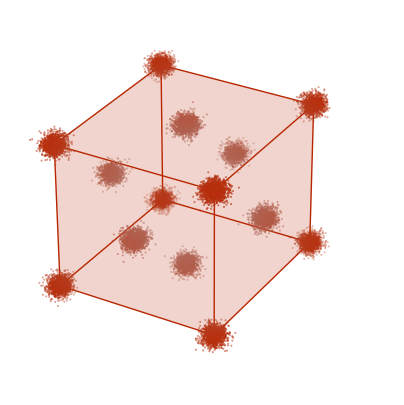

Original page dimensions (in points): 291.6000061035156 x 291.6000061035156
Original file replaced with cropped version: ../figs/nickel/cubic_solid_nickel_samples_nobackground.pdf


In [ ]:
# Cubic solid cut off from Nickel (length=1)
nickel = Nickel(cutoff='rectangular_solid', cutout_x=1, cutout_y=1, cutout_z=1)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection="3d")

# use the red colormap here
ax = nickel.plot_rectangular_solid(
    ax=ax,
    num_samples=NUM_SAMPLES,
    cmap=cmap_red,
    facecolor=RED,
    # no center / in_plane / highlight -> original radial behavior
)

ax.set_xlim(-0.2, 4.5)
ax.set_ylim(-0.2, 4)
ax.set_zlim(-0.2, 3.7)
ax.set_axis_off()
plt.show()

fig_directory = '../figs/nickel/cubic_solid_nickel_samples_nobackground.pdf'
fig.savefig(fig_directory)
crop_pdf_and_replace(fig_directory, 22, 30, 248, 260)  # left, top, right, bottom

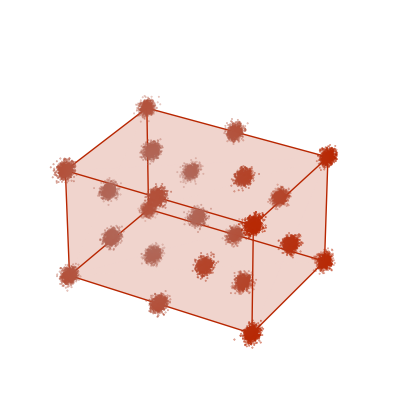

Original page dimensions (in points): 291.6000061035156 x 291.6000061035156
Original file replaced with cropped version: ../figs/nickel/rectangular_solid_nickel_samples_nobackground.pdf


In [2]:
# Rectangular solid cut off from Nickel
rectangular_solid_nickel = Nickel(
    cutoff='rectangular_solid',
    cutout_x=2,
    cutout_y=1,
    cutout_z=1,
)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection="3d")

ax = rectangular_solid_nickel.plot_rectangular_solid(
    ax=ax,
    num_samples=NUM_SAMPLES,
    cmap=cmap_red,
    facecolor=RED,
    # no center / in_plane / highlight
)

ax.set_xlim(-0.5, 7.5)
ax.set_ylim(-0.5, 5)
ax.set_zlim(-0.5, 4.7)
ax.set_axis_off()
plt.show()

fig_directory = '../figs/nickel/rectangular_solid_nickel_samples_nobackground.pdf'
fig.savefig(fig_directory)
crop_pdf_and_replace(fig_directory, 30, 55, 248, 260)  # left, top, right, bottom

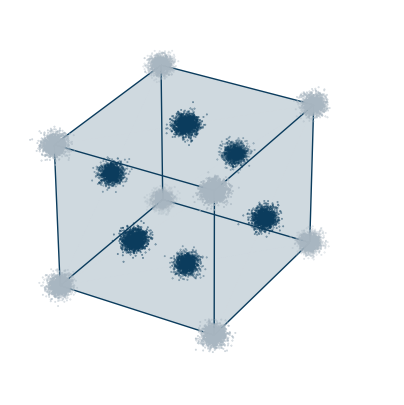

Original page dimensions (in points): 291.6000061035156 x 291.6000061035156
Original file replaced with cropped version: ../figs/nickel/cubic_solid_nickel_samples_center_nobackground.pdf


In [ ]:
# Cubic solid cut off from Nickel (length=1) - center
nickel = Nickel(cutoff='rectangular_solid', cutout_x=1, cutout_y=1, cutout_z=1)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection="3d")
cmap_blue = make_Ramp([MIDDLE, BLUE])

ax = nickel.plot_rectangular_solid(
    ax=ax,
    num_samples=NUM_SAMPLES,
    cmap=cmap_blue,
    facecolor=BLUE,
    center=True,
)

ax.set_xlim(-0.2, 4.5)
ax.set_ylim(-0.2, 4)
ax.set_zlim(-0.2, 3.7)
ax.set_axis_off()
plt.show()

fig_directory = '../figs/nickel/cubic_solid_nickel_samples_center_nobackground.pdf'
fig.savefig(fig_directory)
crop_pdf_and_replace(fig_directory, 22, 30, 248, 260)

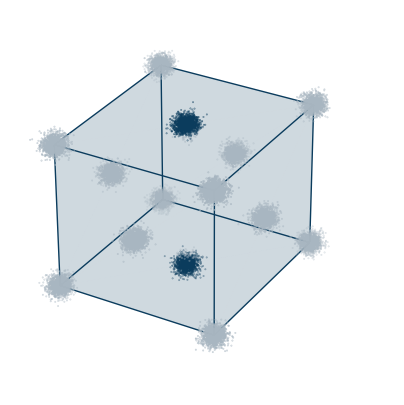

Original page dimensions (in points): 291.6000061035156 x 291.6000061035156
Original file replaced with cropped version: ../figs/nickel/cubic_solid_nickel_samples_top_bottom_nobackground.pdf


In [9]:
# Cubic solid cut off from Nickel (length=1) - top & bottom face centers only
nickel = Nickel(cutoff='rectangular_solid', cutout_x=1, cutout_y=1, cutout_z=1)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection="3d")
cmap_blue = make_Ramp([MIDDLE, BLUE])

ax = nickel.plot_rectangular_solid(
    ax=ax,
    num_samples=NUM_SAMPLES,
    cmap=cmap_blue,
    facecolor=BLUE,
    highlight="top_bottom",
)

ax.set_xlim(-0.2, 4.5)
ax.set_ylim(-0.2, 4)
ax.set_zlim(-0.2, 3.7)
ax.set_axis_off()
plt.show()

fig_directory = '../figs/nickel/cubic_solid_nickel_samples_top_bottom_nobackground.pdf'
fig.savefig(fig_directory)
crop_pdf_and_replace(fig_directory, 22, 30, 248, 260)

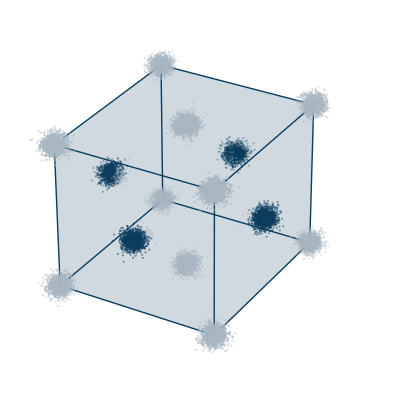

Original page dimensions (in points): 291.6000061035156 x 291.6000061035156
Original file replaced with cropped version: ../figs/nickel/cubic_solid_nickel_samples_side_faces_nobackground.pdf


In [ ]:
# Cubic solid cut off from Nickel (length=1) - 4 side face centers only
nickel = Nickel(cutoff='rectangular_solid', cutout_x=1, cutout_y=1, cutout_z=1)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection="3d")
cmap_blue = make_Ramp([MIDDLE, BLUE])

ax = nickel.plot_rectangular_solid(
    ax=ax,
    num_samples=NUM_SAMPLES,
    cmap=cmap_blue,
    facecolor=BLUE,
    highlight="side_faces",
)

ax.set_xlim(-0.2, 4.5)
ax.set_ylim(-0.2, 4)
ax.set_zlim(-0.2, 3.7)
ax.set_axis_off()
plt.show()

fig_directory = '../figs/nickel/cubic_solid_nickel_samples_side_faces_nobackground.pdf'
fig.savefig(fig_directory)
crop_pdf_and_replace(fig_directory, 22, 30, 248, 260)

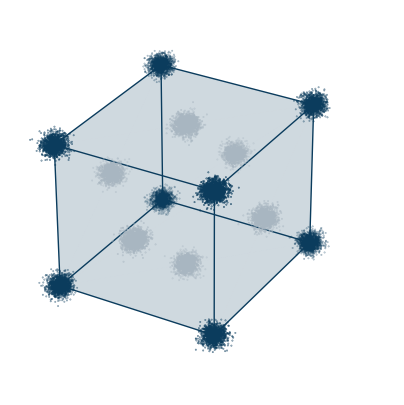

Original page dimensions (in points): 291.6000061035156 x 291.6000061035156
Original file replaced with cropped version: ../figs/nickel/cubic_solid_nickel_samples_corner_nobackground.pdf


In [5]:
# Cubic solid cut off from Nickel (length=1) - corner
nickel = Nickel(cutoff='rectangular_solid', cutout_x=1, cutout_y=1, cutout_z=1)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection="3d")
cmap_blue = make_Ramp([MIDDLE, BLUE])

ax = nickel.plot_rectangular_solid(
    ax=ax,
    num_samples=NUM_SAMPLES,
    cmap=cmap_blue,
    facecolor=BLUE,
    center=False,     # old behavior
)

ax.set_xlim(-0.2, 4.5)
ax.set_ylim(-0.2, 4)
ax.set_zlim(-0.2, 3.7)
ax.set_axis_off()
plt.show()

fig_directory = '../figs/nickel/cubic_solid_nickel_samples_corner_nobackground.pdf'
fig.savefig(fig_directory)
crop_pdf_and_replace(fig_directory, 22, 30, 248, 260)

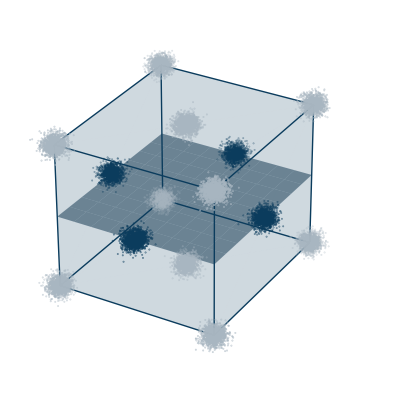

Original page dimensions (in points): 291.6000061035156 x 291.6000061035156
Original file replaced with cropped version: ../figs/nickel/cubic_solid_nickel_samples_in_plane_nobackground.pdf


In [6]:
# Cubic solid cut off from Nickel (length=1) - in_plane
nickel = Nickel(cutoff='rectangular_solid', cutout_x=1, cutout_y=1, cutout_z=1)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection="3d")
cmap_blue = make_Ramp([MIDDLE, BLUE])

ax = nickel.plot_rectangular_solid(
    ax=ax,
    num_samples=NUM_SAMPLES,
    cmap=cmap_blue,
    facecolor=BLUE,
    in_plane=True,    # old behavior
)

xx, yy = np.meshgrid(np.linspace(0, 3.52, 10), np.linspace(0, 3.52, 10))
z = np.ones((10, 10)) * 1.76
ax.plot_surface(xx, yy, z, color=BLUE, alpha=.5)

ax.set_xlim(-0.2, 4.5)
ax.set_ylim(-0.2, 4)
ax.set_zlim(-0.2, 3.7)
ax.set_axis_off()
plt.show()

fig_directory = '../figs/nickel/cubic_solid_nickel_samples_in_plane_nobackground.pdf'
fig.savefig(fig_directory)
crop_pdf_and_replace(fig_directory, 22, 30, 248, 260)

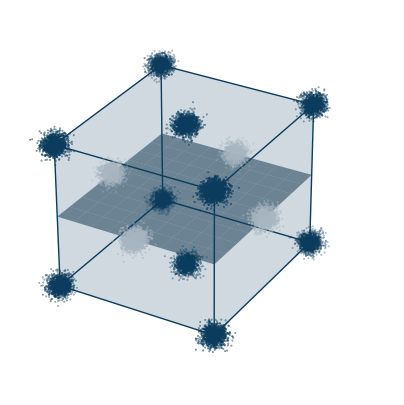

Original page dimensions (in points): 291.6000061035156 x 291.6000061035156
Original file replaced with cropped version: ../figs/nickel/cubic_solid_nickel_samples_out_of_plane_nobackground.pdf


In [7]:
# Cubic solid cut off from Nickel (length=1) - out_of_plane
nickel = Nickel(cutoff='rectangular_solid', cutout_x=1, cutout_y=1, cutout_z=1)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection="3d")
cmap_blue = make_Ramp([MIDDLE, BLUE])

ax = nickel.plot_rectangular_solid(
    ax=ax,
    num_samples=NUM_SAMPLES,
    cmap=cmap_blue,
    facecolor=BLUE,
    in_plane=False,   # old behavior
)

xx, yy = np.meshgrid(np.linspace(0, 3.52, 10), np.linspace(0, 3.52, 10))
z = np.ones((10, 10)) * 1.76
ax.plot_surface(xx, yy, z, color=BLUE, alpha=.5)

ax.set_xlim(-0.2, 4.5)
ax.set_ylim(-0.2, 4)
ax.set_zlim(-0.2, 3.7)
ax.set_axis_off()
plt.show()

fig_directory = '../figs/nickel/cubic_solid_nickel_samples_out_of_plane_nobackground.pdf'
fig.savefig(fig_directory)
crop_pdf_and_replace(fig_directory, 22, 30, 248, 260)